In [5]:
import numpy as np

# 设置均值向量和协方差矩阵
mu = np.array([1, 1])  # 均值向量
Sigma = np.array([[1, 0.8], [0.8, 1]])  # 协方差矩阵

# 设置样本大小
N = 10

# 从多元正态分布中抽样
samples = np.random.multivariate_normal(mu, Sigma, N)

# 打印样本数据
print("Generated samples:")
print(samples)


Generated samples:
[[-0.32935268  0.02018352]
 [ 1.09153774  0.24522839]
 [ 2.36224352  2.43833085]
 [ 0.95597091  0.63368881]
 [-0.33062434  0.23237103]
 [ 0.75067723  0.31981519]
 [ 2.33137891  3.04416585]
 [ 2.52947733  2.01944625]
 [ 1.6249431   0.12128652]
 [ 1.72495975  2.12623945]]


In [6]:
import numpy as np

# 设置均值向量和协方差矩阵
mu = np.array([1, 1])  # 均值向量
Sigma = np.array([[1, 0.8], [0.8, 1]])  # 协方差矩阵

# 设置样本大小
N = 10

# 从多元正态分布中抽样
samples = np.random.multivariate_normal(mu, Sigma, N)

# 计算样本均值向量 x_bar
x_bar = np.mean(samples, axis=0)

# 计算样本协方差矩阵 S
S = np.cov(samples, rowvar=False)

# 打印样本均值向量和样本协方差矩阵
print("Sample mean vector (x_bar):")
print(x_bar)
print("\nSample covariance matrix (S):")
print(S)

# 比较样本均值向量和样本协方差矩阵与真实的均值和协方差矩阵
print("\nTrue mean vector (mu):")
print(mu)
print("\nTrue covariance matrix (Sigma):")
print(Sigma)

# 计算均值的差异
mean_diff = np.linalg.norm(x_bar - mu)
print(f"\nDifference between sample mean and true mean: {mean_diff}")

# 计算协方差矩阵的差异（Frobenius范数）
cov_diff = np.linalg.norm(S - Sigma, 'fro')
print(f"Difference between sample covariance matrix and true covariance matrix: {cov_diff}")


Sample mean vector (x_bar):
[1.21134872 1.11962782]

Sample covariance matrix (S):
[[1.05659677 1.1916667 ]
 [1.1916667  1.65175746]]

True mean vector (mu):
[1 1]

True covariance matrix (Sigma):
[[1.  0.8]
 [0.8 1. ]]

Difference between sample mean and true mean: 0.2428561206176943
Difference between sample covariance matrix and true covariance matrix: 0.8572027752035326


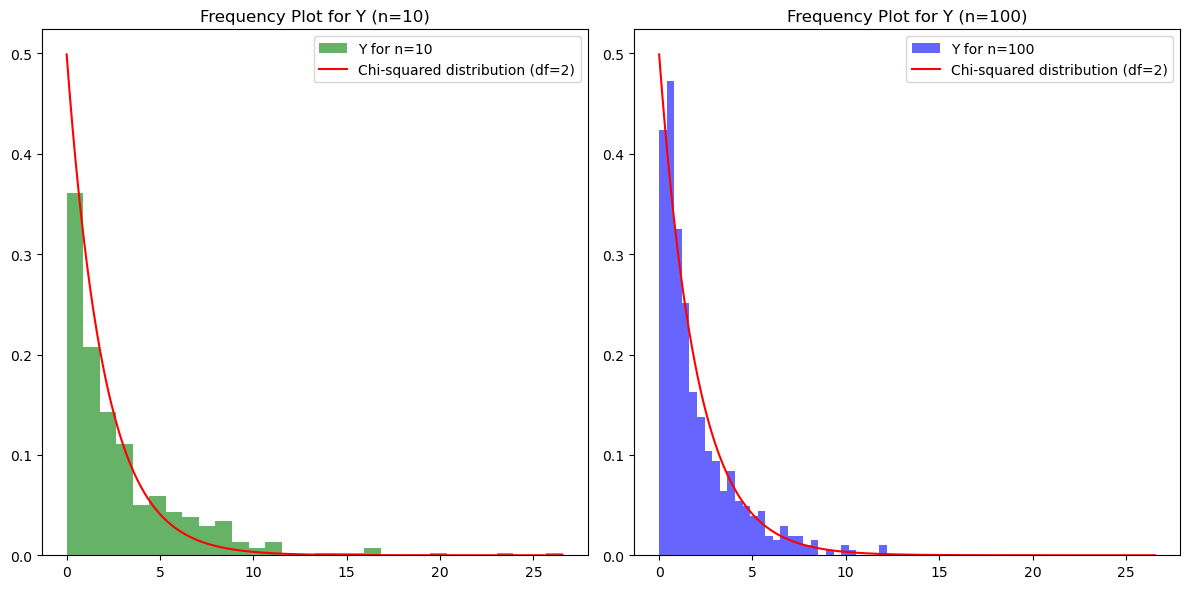

Mean of Y for n=10: 2.8864128867069128
Mean of Y for n=100: 1.9803328276690826


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# 设置均值向量和协方差矩阵
mu = np.array([1, 1])  # 均值向量
Sigma = np.array([[1, 0.8], [0.8, 1]])  # 协方差矩阵

# 设置样本数量和重复次数
n_values = [10, 100]
n_repeats = 500

# 创建一个用于绘制频率图的函数
def generate_Y(mu, Sigma, n, repeats):
    Y_values = []
    for _ in range(repeats):
        # 从多元正态分布中抽样
        samples = np.random.multivariate_normal(mu, Sigma, n)
        
        # 计算样本均值向量和样本协方差矩阵
        x_bar = np.mean(samples, axis=0)
        S = np.cov(samples, rowvar=False)
        
        # 计算Y统计量
        diff = x_bar - mu
        S_inv = np.linalg.inv(S)
        Y = n * np.dot(np.dot(diff, S_inv), diff.T)
        Y_values.append(Y)
    
    return Y_values

# 生成样本数据并计算Y值
Y_10 = generate_Y(mu, Sigma, 10, n_repeats)
Y_100 = generate_Y(mu, Sigma, 100, n_repeats)

# 绘制频率图并与卡方分布进行比较
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 10个样本的频率图
ax[0].hist(Y_10, bins=30, density=True, alpha=0.6, color='g', label='Y for n=10')
x = np.linspace(min(Y_10), max(Y_10), 1000)
ax[0].plot(x, chi2.pdf(x, df=2), 'r-', label='Chi-squared distribution (df=2)')
ax[0].set_title('Frequency Plot for Y (n=10)')
ax[0].legend()

# 100个样本的频率图
ax[1].hist(Y_100, bins=30, density=True, alpha=0.6, color='b', label='Y for n=100')
ax[1].plot(x, chi2.pdf(x, df=2), 'r-', label='Chi-squared distribution (df=2)')
ax[1].set_title('Frequency Plot for Y (n=100)')
ax[1].legend()

plt.tight_layout()
plt.show()

# 计算并打印两个场景的Y值的均值
print(f"Mean of Y for n=10: {np.mean(Y_10)}")
print(f"Mean of Y for n=100: {np.mean(Y_100)}")
